In [425]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [426]:
df=pd.read_csv("Housing.csv")
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [427]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [428]:
# sns.heatmap(df.corr(), annot=True, cmap="Blues" )

In [429]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [430]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Text(0, 0.5, 'Price')

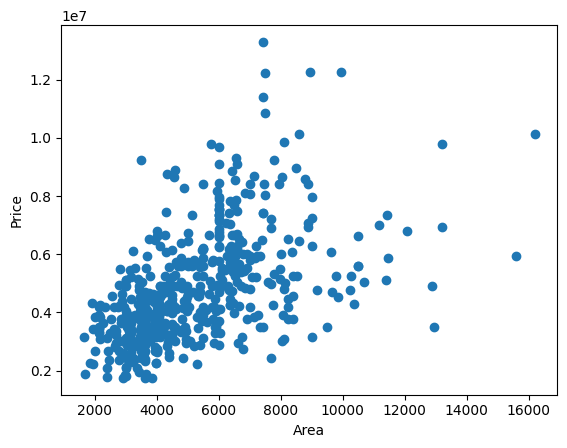

In [431]:
plt.scatter(df.area,df.price)
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

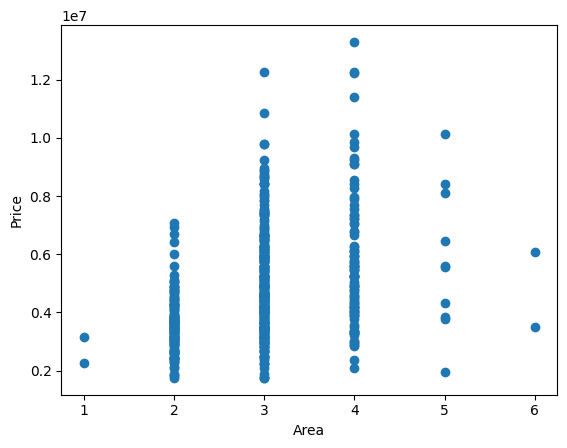

In [432]:
plt.scatter(df.bedrooms,df.price)
plt.xlabel('Area')
plt.ylabel('Price')

In [433]:
# def update_column(mainroad):
#   if mainroad == 'yes':
#      mainroad = 1
#      return mainroad
#   elif mainroad == 'no':
#     mainroad = 0
#     return mainroad
#   else :
#     mainroad = 10
#     return mainroad

In [434]:
data_map = {
    "yes" : 1,
    "no" : 0
}

In [435]:
df['mainroad']= df["mainroad"].map(data_map)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [436]:
df['guestroom']= df["guestroom"].map(data_map)
df['basement']= df["basement"].map(data_map)
df['hotwaterheating']= df["hotwaterheating"].map(data_map)
df['airconditioning']= df["airconditioning"].map(data_map)
df['prefarea']= df["prefarea"].map(data_map)

In [437]:
data_map1 = {
    "furnished" : 1,
    "semi-furnished" : 0,
    "unfurnished" : -1
}
df['furnishingstatus']= df["furnishingstatus"].map(data_map1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [438]:
# df['mainroad'] = df['mainroad'].apply(update_column)

In [439]:
# def update_column(guestroom):
#   if guestroom == 'yes':
#      guestroom = 1
#      return guestroom
#   elif guestroom == 'no':
#     guestroom = 0
#     return guestroom
#   else :
#     guestroom = 10
#     return guestroom

In [440]:
# df['guestroom'] = df['guestroom'].apply(update_column)

In [441]:
# def update_column(basement):
#   if basement == 'yes':
#      basement = 1
#      return basement
#   elif basement == 'no':
#     basement = 0
#     return basement
#   else :
#     basement = 10
#     return basement

In [442]:
# df['basement'] = df['basement'].apply(update_column)

In [443]:
# def update_column(hotwaterheating):
#   if hotwaterheating == 'yes':
#      hotwaterheating = 1
#      return hotwaterheating
#   elif hotwaterheating == 'no':
#     hotwaterheating = 0
#     return hotwaterheating
#   else :
#     hotwaterheating = 10
#     return hotwaterheating

In [444]:
# df['hotwaterheating'] = df['hotwaterheating'].apply(update_column)

In [445]:
# def update_column(airconditioning):
#   if airconditioning == 'yes':
#      airconditioning = 1
#      return airconditioning
#   elif airconditioning == 'no':
#     airconditioning = 0
#     return airconditioning
#   else :
#     airconditioning = 10
#     return airconditioning

In [446]:
# df['airconditioning'] = df['airconditioning'].apply(update_column)

In [447]:
# def update_column(prefarea):
#   if prefarea == 'yes':
#      prefarea = 1
#      return prefarea
#   elif prefarea == 'no':
#     prefarea = 0
#     return prefarea
#   else :
#     prefarea = 10
#     return prefarea

In [448]:
# df['prefarea'] = df['prefarea'].apply(update_column)

In [449]:
# def update_column(furnishingstatus):
#   if furnishingstatus == 'furnished':
#      furnishingstatus = 1
#      return furnishingstatus
#   elif furnishingstatus == 'semi-furnished':
#     furnishingstatus = 0
#     return furnishingstatus
#   elif furnishingstatus == 'unfurnished':
#     furnishingstatus = -1
#     return furnishingstatus
#   else :
#     furnishingstatus = 10
#     return furnishingstatus

In [450]:
# df['furnishingstatus'] = df['furnishingstatus'].apply(update_column)

In [451]:
# df

Text(0, 0.5, 'Price')

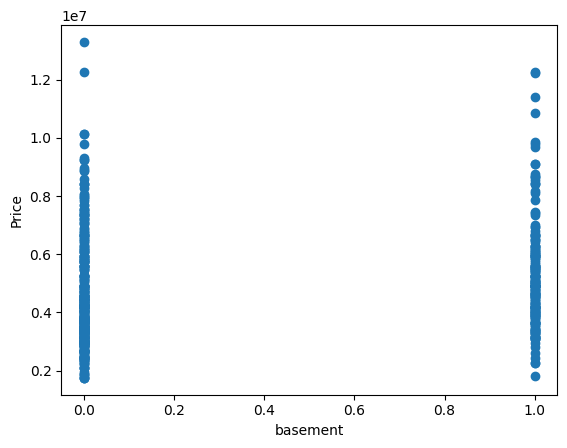

In [452]:
plt.scatter(df.basement,df.price)
plt.xlabel('basement')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

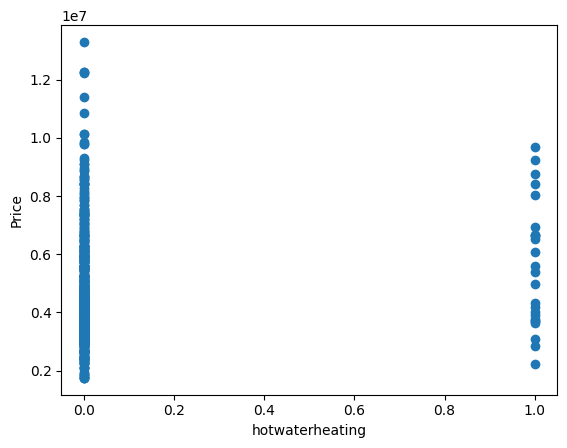

In [453]:
plt.scatter(df.hotwaterheating,df.price)
plt.xlabel('hotwaterheating')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

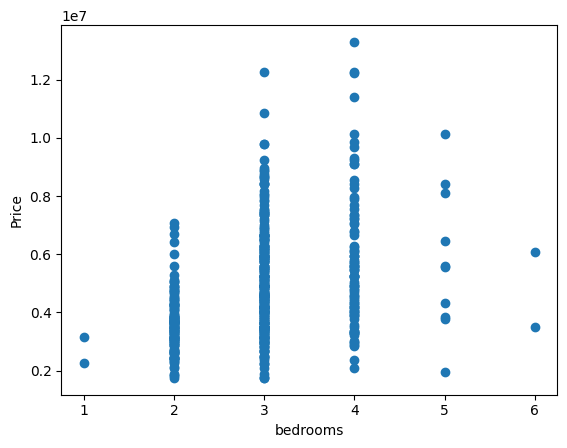

In [454]:
plt.scatter(df.bedrooms,df.price)
plt.xlabel('bedrooms')
plt.ylabel('Price')

In [455]:
# df1 = df. drop(['hotwaterheating','basement','guestroom'], axis=1)
# df1

In [456]:
lower_limit= df['area'].quantile(0.1)
lower_limit
df[df['area']<lower_limit]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
157,5495000,2817,4,2,2,0,1,1,0,0,1,0,1
197,4956000,2800,3,2,2,0,0,1,0,1,1,0,0
208,4900000,2970,3,1,3,1,0,0,0,0,0,0,0
236,4620000,2870,2,1,2,1,1,1,0,0,0,1,0
243,4550000,2550,3,1,2,1,0,1,0,0,0,0,1
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,0
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,0
282,4270000,2175,3,1,2,0,1,1,0,1,0,0,-1
286,4235000,2787,3,1,1,1,0,1,0,0,0,1,1
290,4200000,2610,4,3,2,0,0,0,0,0,0,0,0


In [457]:
upper_limit= df['area'].quantile(0.90)
upper_limit
df[df['area']>upper_limit]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,-1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,1
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,1
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,0


In [458]:
df2= df[(df['area'] < upper_limit) & (df['area'] > lower_limit)]
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2100000,3360,2,1,1,1,0,0,0,0,1,0,-1
536,1960000,3420,5,1,2,0,0,0,0,0,0,0,-1
538,1890000,3649,2,1,1,1,0,0,0,0,0,0,-1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1


In [459]:
model=LinearRegression()

In [460]:
x=df2.drop(['price'],axis=1).values
y=df2.price

In [461]:
df2.ndim

2

In [462]:
y.ndim

1

In [463]:
x.ndim

2

In [464]:
x

array([[7420,    4,    2, ...,    2,    1,    1],
       [7500,    4,    2, ...,    3,    1,    1],
       [7420,    4,    1, ...,    2,    0,    1],
       ...,
       [3649,    2,    1, ...,    0,    0,   -1],
       [3620,    2,    1, ...,    0,    0,   -1],
       [3850,    3,    1, ...,    0,    0,   -1]], dtype=int64)

In [465]:
y

0      13300000
3      12215000
4      11410000
5      10850000
9       9800000
         ...   
535     2100000
536     1960000
538     1890000
542     1750000
544     1750000
Name: price, Length: 423, dtype: int64

In [466]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [467]:
len(x_train)

338

In [468]:
len(x_test)

85

In [469]:
len(y_train)

338

In [470]:
len(y_test)

85

In [471]:
model.fit(x_train, y_train)

LinearRegression()

In [472]:
model.intercept_

-192066.71210541483

In [473]:
model.coef_

array([2.58373530e+02, 1.74455794e+05, 8.64239009e+05, 5.01560421e+05,
       3.79963218e+05, 4.35797977e+05, 3.35305702e+05, 7.83920328e+05,
       7.55954257e+05, 3.36015393e+05, 7.23752217e+05, 1.79700834e+05])

In [474]:
y_pred = model.predict(x_test)

In [475]:
r2_score(y_test, y_pred)

0.7173871282022293

In [477]:
model.predict([[2500, 1, 1, 1, 1, 1, 1,0 ,1,1,1,1 ]])

array([5140611.93624806])

In [ ]:
with open('model.pkl','wb') as files:
    pickle .dump(model,files)